In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# import plotly.offline as py
# py.init_notebook_mode(connected = True)
# import plotly.graph_objs as go
# import plotly.tools as tls
# from collections import Counter
# import plotly.figure_factory as ff
# import plotly.express as px
# import cufflinks as cf
# import chart_studio.plotly as py
# Ml libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings('ignore')

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [120]:
df = pd.read_csv('german_credit_data.csv', index_col = 0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [121]:
df.shape

(1000, 10)

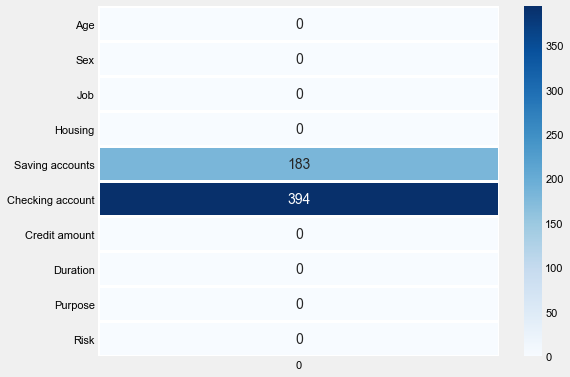

In [122]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna().sum().to_frame(), cmap = 'Blues' ,annot = True, fmt = 'd',linewidths = 2)
plt.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [124]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

male      690
female    310
Name: Sex, dtype: int64 


own     713
rent    179
free    108
Name: Housing, dtype: int64 


little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 


little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64 


good    700
bad     300
Name: Risk, dtype: int64 




# Risk Visulaization 

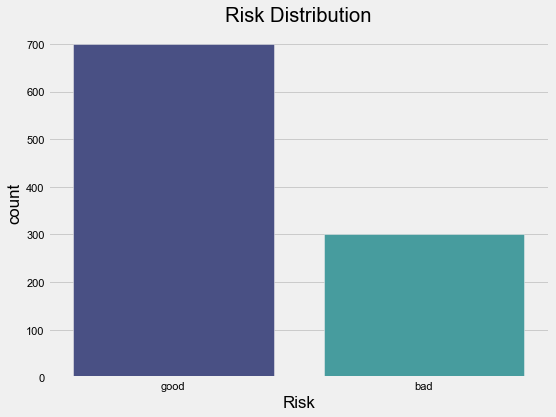

In [125]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'Risk', data=df, palette = 'mako')
plt.title('Risk Distribution')
plt.show()

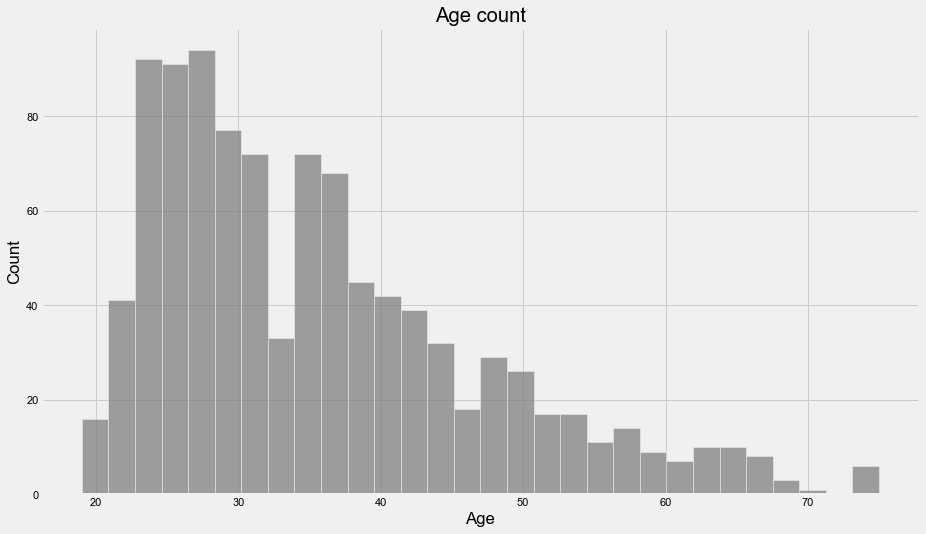

In [143]:
plt.figure(figsize=(14,8))
sns.histplot(x='Age', data=df, bins = 30)
plt.title('Age count')
plt.show()

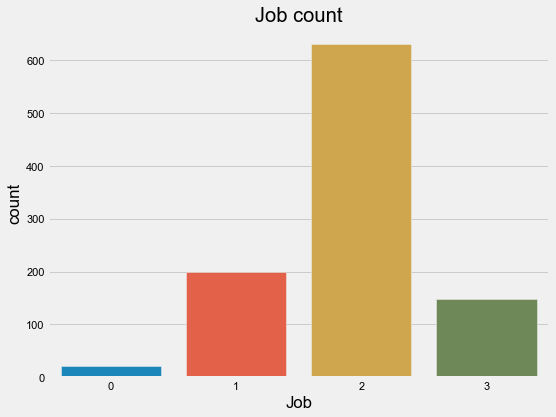

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(x='Job',data=df)
plt.title('Job count')
plt.show()

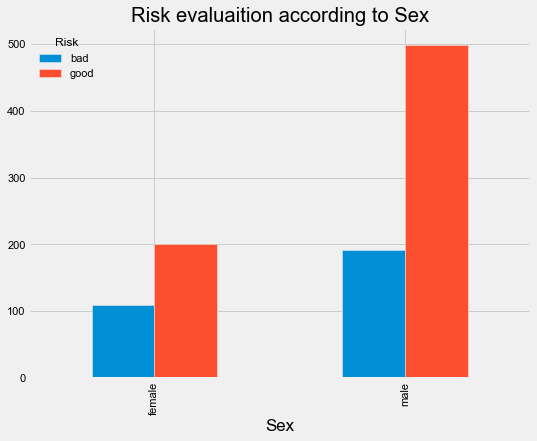

In [128]:
pd.crosstab(df.Sex, df.Risk).plot(kind = 'bar', figsize=(8,6))
plt.title('Risk evaluaition according to Sex')
plt.show()

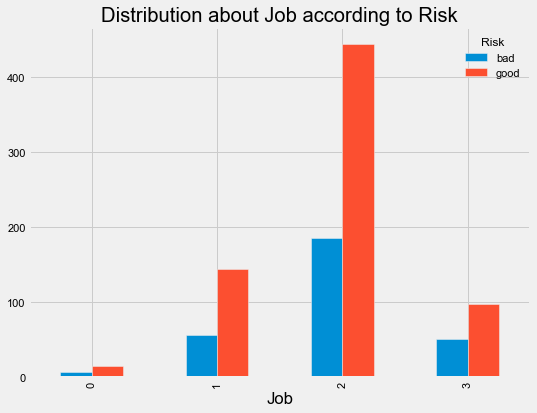

In [130]:
pd.crosstab(df.Job, df.Risk).plot(kind = 'bar', figsize=(8,6))
plt.title('Distribution about Job according to Risk')
plt.show()

In [129]:
df[['Job', 'Risk']].groupby(['Job'], as_index = False).count().sort_values(by='Risk', 
                                                                           ascending = False)

,Job,Risk
2,2,630
1,1,200
3,3,148
0,0,22


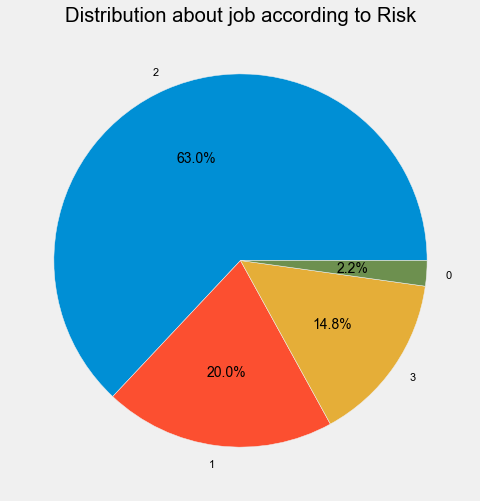

In [131]:
labels = df['Job'].value_counts().index
size = df['Job'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution about job according to Risk')
plt.show()

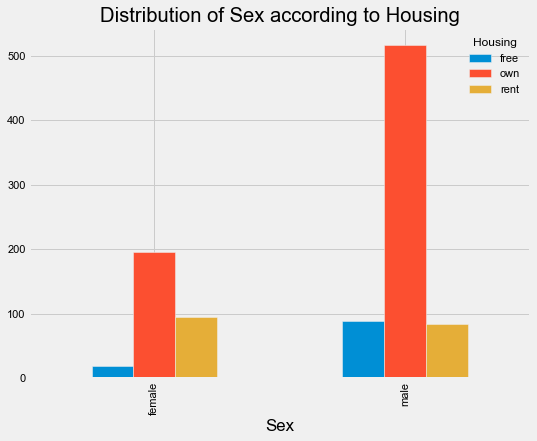

In [144]:
pd.crosstab(df.Sex, df.Housing).plot(kind = 'bar', figsize=(8,6))
plt.title('Distribution of Sex according to Housing')
plt.show()

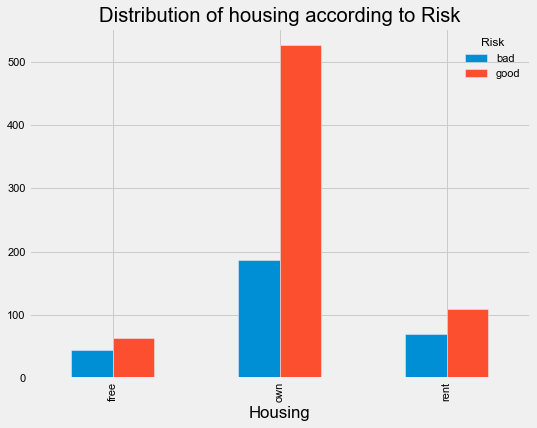

In [134]:
pd.crosstab(df.Housing, df.Risk).plot(kind = 'bar', figsize=(8,6))
plt.title('Distribution of housing according to Risk')
plt.show()

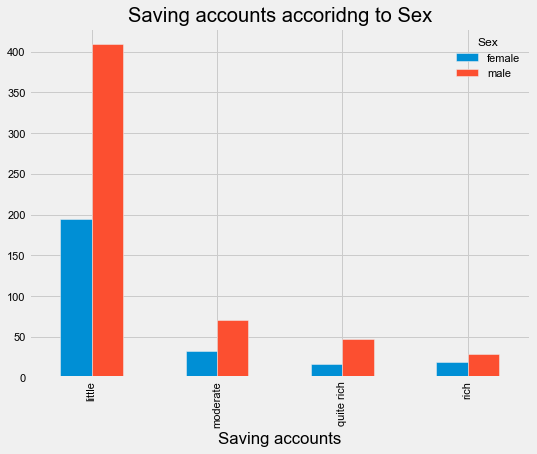

In [163]:
pd.crosstab(df['Saving accounts'], df['Sex']).plot(kind = 'bar', figsize=(8,6))
plt.title('Saving accounts accoridng to Sex')
plt.show()

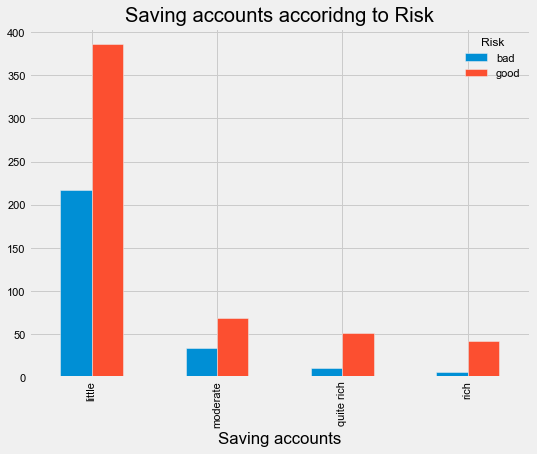

In [165]:
pd.crosstab(df['Saving accounts'], df['Risk']).plot(kind = 'bar', figsize=(8,6))
plt.title('Saving accounts accoridng to Risk')
plt.show()

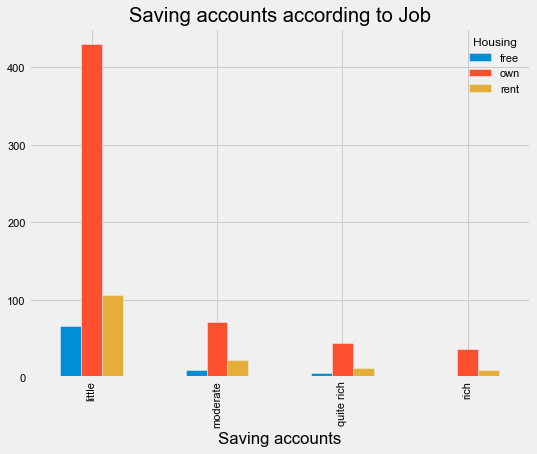

In [175]:
pd.crosstab(df['Saving accounts'], df['Housing']).plot(kind = 'bar', figsize = (8,6))
plt.title('Saving accounts according to Job')
plt.show()

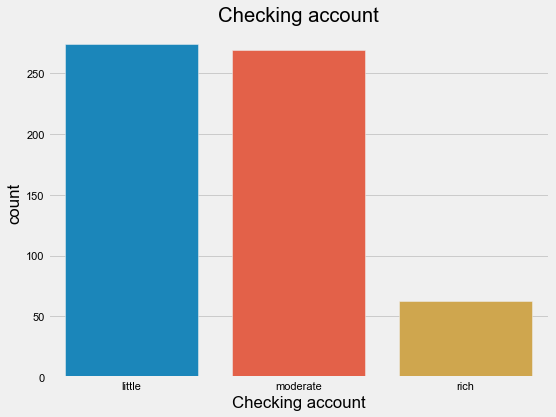

In [168]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Checking account', data = df)
plt.title('Checking account')
plt.show()

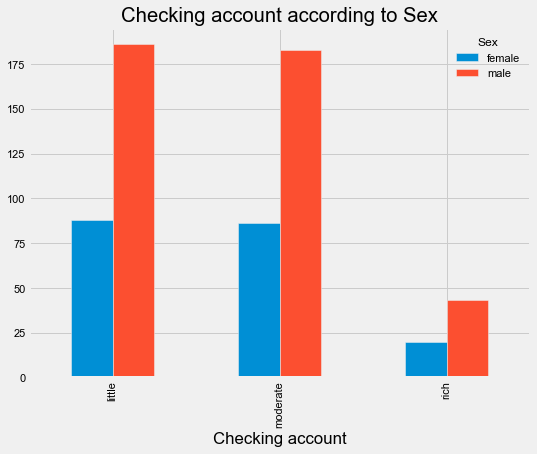

In [170]:
pd.crosstab(df['Checking account'],df['Sex']).plot(kind = 'bar', figsize=(8,6))
plt.title('Checking account according to Sex')
plt.show()

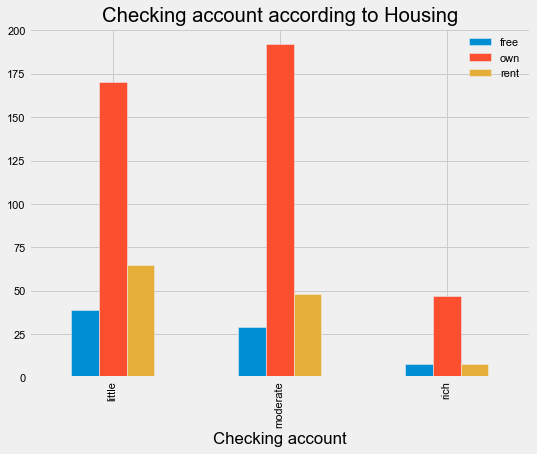

In [198]:
pd.crosstab(df['Checking account'],df['Housing']).plot(kind = 'bar', figsize=(8,6))
plt.title('Checking account according to Housing')
plt.legend()
plt.show()

In [199]:
df[['Checking account', 'Job']].groupby(['Checking account'],as_index = False).count().sort_values(by  = 'Job',
                                                                                  ascending = False)

,Checking account,Job
0,little,274
1,moderate,269
2,rich,63


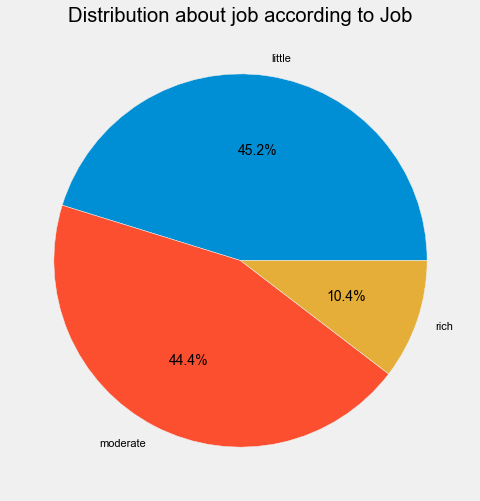

In [197]:
labels = df['Checking account'].value_counts().index
size = df['Checking account'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution about job according to Job')
plt.show()

<AxesSubplot:xlabel='Credit amount', ylabel='Job'>

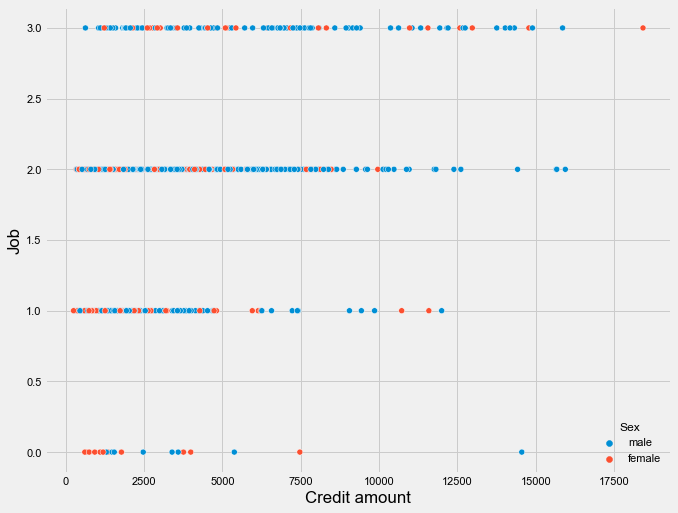

In [190]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Credit amount', y = 'Job', hue = 'Sex',data = df)
plt.title()

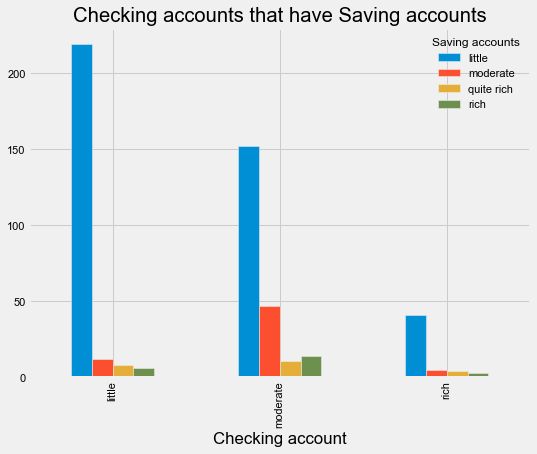

In [202]:
pd.crosstab(df['Checking account'], df['Saving accounts']).plot(kind = 'bar', figsize = (8,6))
plt.title('Checking accounts that have Saving accounts')
plt.show()

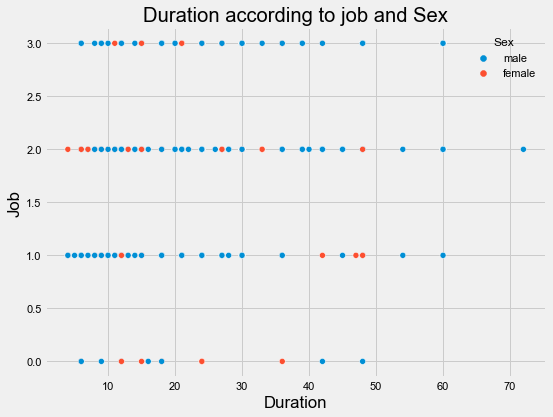

In [212]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Duration', y = 'Job', hue = 'Sex' ,data = df)
plt.title('Duration according to job and Sex')
plt.show()